### This workbooks is a first cut to a tool to pre-select sources to be spectroscopically analyzed with SAMOS.

It is based on the examples of the ipyaladin module, avaialable at 
https://github.com/cds-astro/ipyaladin , in particular Example 8_Rectangular-selection.ipynb

In [1]:
import ipyaladin.aladin_widget as ipyal
import pandas as pd
from astroquery.simbad import Simbad
import astropy.units as u
from astropy import coordinates, units as u, wcs
from astroquery.vizier import Vizier
from astropy.io.votable import parse
from astropy.table import Table, Column
import numpy as np
from ipyaladin import Aladin
from ipywidgets import Layout, Box, widgets
import matplotlib.pyplot as plt

%matplotlib inline

Upload and display an image in Aladin.
For a list of good surveys, check https://aladin.u-strasbg.fr/AladinLite/

In [2]:
aladin = ipyal.Aladin(target='M 42', fov=1.5, survey='P/2MASS/color')
#aladin = ipyal.Aladin(target='M 42', fov=1.5, survey='P/allWise/color')
aladin

Aladin(fov=1.5, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', 'ov…

Extract a source catalog from Simbad

# 1) Extract Default Simbad Table

We starr extracting the data as Simbad Table. This is a class designed to represent tables of heterogeneous data. It is better than a numpy structured array because of the ability to easily modify the structure of the table by adding or removing columns, or adding new rows of data. In addition table and column metadata are fully supported. See 
http://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table

In [3]:
Simbad.SIMBAD_URL = 'http://simbad.harvard.edu/simbad/sim-script'

#To query Simbad, see https://astroquery.readthedocs.io/en/latest/simbad/simbad.html
table = Simbad.query_region("m42", radius=0.05 * u.deg)
#this defines the object "table" that we will use later
#
#How to convert a generic table in my disk to a Simbad Table?
table


MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
M 42,05 35 17.3,-05 23 28,5,5,7500.000,7500.000,90,D,,1981MNRAS.194..693L,1
NAME Ori Region,05 35 17.30,-05 23 28.0,6,6,--,--,0,D,O,,1
[FRM2016] 344,05 35 17.2210,-05 23 26.542,9,9,--,--,0,C,R,2016ApJ...822...93F,1
DOH 7 175-328,05 35 17.5,-05 23 28,5,5,--,--,0,D,,2004AJ....127.3456D,1
MAX 126,05 35 17.11,-05 23 29.3,6,6,--,--,0,D,I,2005AJ....129.1534R,1
DOH 7 171-327,05 35 17.1,-05 23 27,5,5,--,--,0,D,,2004AJ....127.3456D,1
...,...,...,...,...,...,...,...,...,...,...,...
JW 377,05 35 12.2722,-05 20 45.145,14,14,0.255,0.258,90,A,O,2018yCat.1345....0G,1


# 2) Extract Table from published dataset

In [4]:
center = coordinates.SkyCoord.from_name('Orion KL')


tablelist = Vizier.query_region(center, radius=5*u.arcmin,
                                catalog='J/ApJ/826/16/table1')
# the result is a list of tables, so we'll get the first one
result = tablelist[0]
print(tablelist[0])  # this is a table list type object.

Seq   RAJ2000     DEJ2000    Ksmag
      "h:m:s"     "d:m:s"     mag 
--- ----------- ------------ -----
  1 05 35 12.95 -05 22 44.34  14.0
  2 05 35 12.35 -05 22 41.35  14.2
  3 05 35 15.39 -05 22 39.93  14.0
  4 05 35 13.30 -05 22 39.32  13.9
  5 05 35 14.50 -05 22 38.78  14.1
  6 05 35 12.31 -05 22 34.19  14.4
...         ...          ...   ...
 34 05 35 15.19 -05 20 15.01   9.7
 35 05 35 10.98 -05 20 12.94  13.7
 36 05 35 14.17 -05 20 08.17  11.8
 37 05 35 14.21 -05 20 04.50   7.9
 38 05 35 14.25 -05 20 03.84  11.8
 39 05 35 11.90 -05 20 02.42   9.4
 40 05 35 14.84 -05 20 02.29  14.4
Length = 40 rows


# 3) READ TABLE FROM AN UNPUBLISHED, NON SIMBAD CATALOG

In [5]:
#Read a CSV file as a pandas file
catfile = 'Tables/Slimtable_F130&MainIDfixed_8782.csv'
pandacat = pd.read_csv(catfile)

#check...
pandacat.head()

#to create an astropy table, use
table1 = table.from_pandas(pandacat)
table1

index,MainID,OtherID,RA,DEC,X_mos,Y_mos,mag130,dmag130,mag139,dmag139,color,dcolor,Delta130,Delta139,Nr_IR
int64,int64,str24,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
0,0,44-1078,83.62638127,-5.457796715,10112.93708,7947.759999,9.79719,0.0200096,9.77856,0.20154,-0.0771351,0.115685,0.0610695,0.563724,3
1,1,26-47-65,83.60899771,-5.441776639,10598.80566,8397.328145,10.9083,0.0185066,10.6736,0.0265132,0.240065,0.0172287,0.0611172,0.0769806,4
2,2,48,83.6163478,-5.442952953,10393.40753,8364.360953,11.7239,0.0109769,11.5305,0.0177515,0.195181,0.00717064,0.0273504,0.0428772,2
3,3,122,83.63294382,-5.443574706,9929.648054,8347.017071,12.1459,0.0300123,12.1324,0.0124562,0.0306892,0.0207105,0.0713882,0.026536,2
4,4,50,83.61754036,-5.444362865,10360.07306,8324.792596,13.3779,0.0103522,13.4268,0.0228317,-0.0532584,0.018213,0.0280094,0.0634899,2
5,5,27-49-67,83.60019909,-5.440294899,10844.68505,8438.855152,13.6083,0.0131712,13.1289,0.00630562,0.483117,0.00306582,0.0382137,0.0181913,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,8743,-,83.92383617,-5.69954177,1802.937854,1161.756496,21.0545,0.160451,20.9737,0.0126738,0.309638,0.417308,0.226912,0.0251713,1
4504,8744,-,83.92183983,-5.69522258,1858.667915,1283.014316,20.7109,0.0309297,20.9714,0.0660923,-0.2548,0.123321,0.0437412,0.130661,1


# 4) READ A TABLE EXTRACTED FROM VIZIER X-MATCH LIBRARY 

In [6]:
#The X-match output table is a VOTable. Must handled with care, Pandas seems to work.

#Routine is required to read VOTable => Pandas
def votable_to_pandas(votable_file):
    votable = parse(votable_file)
    table = votable.get_first_table().to_table(use_names_over_ids=True)
    return table.to_pandas()

#here we go...
catfile = 'Tables/Slimtable.csv.vot'
pandacat  = votable_to_pandas(catfile)

pandacat.head()

,index,RA,DEC,X_mos,Y_mos,mag130,dmag130,mag139,dmag139,color,dcolor,Delta130,Delta139
0,0,83.626381,-5.457797,10112.937080,7947.759999,9.79719,0.020010,9.77856,0.201540,-0.077135,0.115685,0.061069,0.563724
1,1,83.608998,-5.441777,10598.805660,8397.328145,10.90830,0.018507,10.67360,0.026513,0.240065,0.017229,0.061117,0.076981
2,2,83.616348,-5.442953,10393.407530,8364.360953,11.72390,0.010977,11.53050,0.017751,0.195181,0.007171,0.027350,0.042877
3,3,83.632944,-5.443575,9929.648054,8347.017071,12.14590,0.030012,12.13240,0.012456,0.030689,0.020710,0.071388,0.026536
4,4,83.617540,-5.444363,10360.073060,8324.792596,13.37790,0.010352,13.42680,0.022832,-0.053258,0.018213,0.028009,0.063490


One way or the other we have managed to read a catalog. Next step:

# SET THE RANKING

We select from the private dataset, using Pandas: 

1) all stars between J=12 and 15

2) With water in absorption

In [7]:
criteria=(pandacat['mag130'] > 12) & (pandacat['mag130'] < 15)
pandacat2 = pandacat[criteria]
pandacat2.head

<bound method NDFrame.head of       index         RA       DEC         X_mos        Y_mos   mag130  \
3         3  83.632944 -5.443575   9929.648054  8347.017071  12.1459   
4         4  83.617540 -5.444363  10360.073060  8324.792596  13.3779   
5         5  83.600199 -5.440295  10844.685050  8438.855152  13.6083   
6         6  83.624958 -5.421466  10152.944790  8967.553107  13.2284   
7         7  83.622401 -5.431073  10224.339930  8697.870091  13.7699   
...     ...        ...       ...           ...          ...      ...   
4440   4440  83.927963 -5.676457   1687.493805  1809.724011  14.7710   
4469   4469  83.912612 -5.683232   2116.342653  1619.672950  12.2033   
4470   4470  83.923624 -5.676921   1808.699806  1796.743379  14.5086   
4471   4471  83.927098 -5.682654   1711.707193  1635.781733  14.9022   
4490   4490  83.931691 -5.708912   1583.614537   898.662426  12.7847   

       dmag130   mag139   dmag139     color    dcolor  Delta130  Delta139  
3     0.030012  12.1324  0.01

In [8]:
# and create the astropy table...
table1 = table.from_pandas(pandacat2)
table1


index,RA,DEC,X_mos,Y_mos,mag130,dmag130,mag139,dmag139,color,dcolor,Delta130,Delta139
int16,float64,float64,float64,float64,float32,float64,float32,float64,float64,float64,float64,float64
3,83.632944,-5.443575,9929.648054,8347.017071,12.1459,0.0300123,12.1324,0.0124562,0.0306892,0.0207105,0.0713882,0.026536
4,83.61754,-5.444363,10360.07306,8324.792596,13.3779,0.0103522,13.4268,0.0228317,-0.0532584,0.018213,0.0280094,0.0634899
5,83.600199,-5.440295,10844.68505,8438.855152,13.6083,0.0131712,13.1289,0.00630562,0.483117,0.00306582,0.0382137,0.0181913
6,83.624958,-5.421466,10152.94479,8967.553107,13.2284,0.0132644,13.3092,0.0140082,-0.0934917,0.0160946,0.0340614,0.0423231
7,83.622401,-5.431073,10224.33993,8697.870091,13.7699,0.00403174,13.8486,0.00431242,-0.0787315,0.00533006,0.00882912,0.0105276
39,83.599874,-5.476306,10853.48308,7428.02447,13.8732,0.0366342,14.0238,0.038855,-0.153075,0.00249785,0.125285,0.117202
...,...,...,...,...,...,...,...,...,...,...,...,...
4438,83.931004,-5.6819,1602.595753,1656.92631,12.82,0.024724,12.7787,0.0134676,0.0355985,0.00801408,0.0710669,0.0408621
4439,83.927781,-5.678356,1692.596942,1756.420858,13.2501,0.00980722,13.231,0.0198731,0.0193659,0.0150239,0.0280943,0.0629997


In [9]:
# check...

#table1['DEC']

In [10]:
# Check plotting all the selected sources
# first display
#aladin= ipyal.Aladin(fov= 2.5, target= 'm42', survey='P/allWise/color')
aladin = ipyal.Aladin(target='M 42', fov=1.5, survey='P/2MASS/color')
aladin

Aladin(fov=1.5, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', 'ov…

In [11]:
#then overplot
aladin.add_table(table1)

In [12]:
#ADD THE RANK COLUMN
col_e = Column(name='rank', data=np.zeros(1081))  # all ranks set to 0 to begin with...
table1.add_columns([col_e],indexes=[4])
table1

index,RA,DEC,X_mos,rank,Y_mos,mag130,dmag130,mag139,dmag139,color,dcolor,Delta130,Delta139
int16,float64,float64,float64,float64,float64,float32,float64,float32,float64,float64,float64,float64,float64
3,83.632944,-5.443575,9929.648054,0.0,8347.017071,12.1459,0.0300123,12.1324,0.0124562,0.0306892,0.0207105,0.0713882,0.026536
4,83.61754,-5.444363,10360.07306,0.0,8324.792596,13.3779,0.0103522,13.4268,0.0228317,-0.0532584,0.018213,0.0280094,0.0634899
5,83.600199,-5.440295,10844.68505,0.0,8438.855152,13.6083,0.0131712,13.1289,0.00630562,0.483117,0.00306582,0.0382137,0.0181913
6,83.624958,-5.421466,10152.94479,0.0,8967.553107,13.2284,0.0132644,13.3092,0.0140082,-0.0934917,0.0160946,0.0340614,0.0423231
7,83.622401,-5.431073,10224.33993,0.0,8697.870091,13.7699,0.00403174,13.8486,0.00431242,-0.0787315,0.00533006,0.00882912,0.0105276
39,83.599874,-5.476306,10853.48308,0.0,7428.02447,13.8732,0.0366342,14.0238,0.038855,-0.153075,0.00249785,0.125285,0.117202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,83.931004,-5.6819,1602.595753,0.0,1656.92631,12.82,0.024724,12.7787,0.0134676,0.0355985,0.00801408,0.0710669,0.0408621
4439,83.927781,-5.678356,1692.596942,0.0,1756.420858,13.2501,0.00980722,13.231,0.0198731,0.0193659,0.0150239,0.0280943,0.0629997


In [13]:
# set a ranking metric: from bright and red (good) to faint and blue (bad)
table1['rank']=table1['mag130']-50*table1['color']
table1['rank','color']

#... but for the moment I don't use it... 

rank,color
float64,float64
10.611439772644044,0.0306892
16.04082012359619,-0.0532584
-10.54754979095459,0.483117
17.902985230407715,-0.0934917
17.70647532196045,-0.0787315
21.52695041656494,-0.153075
...,...
11.040074694824218,0.0355985
12.281805135803223,0.0193659


### The next two cells are the Example 8 and the core of the entire process

Once the cell below has been executed, you will see the Select button.

Run the following cell, then press and drag a rectangle enclosing the sources you wish to select. 

For SAMOS make sure you select a BOX ~3' X 3'.

You will  see their names in the table at the right of the ipyaladin view.

In [14]:


#aladin = Aladin(layout=Layout(width='50%'), target='M 42', fov=0.05)  #FoV=3'
#aladin = Aladin(layout=Layout(width='50%'), target='M 42', fov=0.05, survey='P/allWise/color')
aladin = Aladin(layout=Layout(width='50%'), target='M 42', fov=0.055, survey='P/2MASS/color')


button = widgets.Button(description="Select")
def on_button_clicked(b):
    aladin.rectangular_selection()
    
button.on_click(on_button_clicked)
table_info = widgets.HTML(layout=Layout(height='auto', overflow='auto'))


box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='100%',
                    position='relative',
                    overflow='hidden',
                    height='140vh',
                    margin='-100px 0 -350px 0',
                    padding='100px 0 0 0 '
                   )
box = Box(children=[aladin, button, table_info], layout=box_layout)
box



Box(children=(Aladin(fov=0.055, layout=Layout(width='50%'), options=['allow_full_zoomout', 'coo_frame', 'fov',…

In [16]:

aladin.add_table(table1)

def process_result(sources):
    global indici
    indici = np.empty(1)
    s = '<table border="1">'
    s += '<tr><th>MAIN_ID</th><th>RA</th><th>DEC</th></tr>'
    for source in sources:
        s += '<tr><td>%s</td><td>%s</td><td>%s</td></tr>' % (source['data']['index'], source['data']['RA'], source['data']['DEC'])
        var = source['data']['index']
        indici = np.append(indici,var)
    s += '</table>'
    table_info.value = s    
  
aladin.add_listener('select', process_result)



## Print the list of selected targets

In [17]:
indici=indici[1:] #remove initial NAN introduced by the creation of the array...
print(indici)
print("Selected",len(indici)," sources")

[ 235.  237.  238.  239.  242.  245.  247.  248.  325.  343.  344.  345.
  347.  348.  351.  353.  354.  357.  358.  359.  360.  361.  362.  405.
  406.  407.  408.  409.  410.  411.  413.  457.  458.  459.  460.  461.
  462.  463.  464.  465.  466.  467.  533.  540.  586.  587.  589.  591.
 1163. 1257. 1258. 1259. 1260. 1261. 1262. 1263. 1264. 1265. 1266. 1267.
 1268. 1269. 1270. 1271. 1272. 1273. 1274. 1275. 1276. 1277. 1278. 1279.
 1280. 1281. 1282. 1283. 1284. 1285. 1314. 1315. 1316. 1317. 1332. 1333.
 1334. 1335. 1336. 1344. 1353. 1354. 1355. 1356. 1357. 1358. 1359. 1360.
 1361. 1363. 1365. 1368. 1369. 1371. 1372. 1404. 1405. 1406. 1407. 1408.
 1409. 1410. 1411. 1412. 1413. 1414. 1415. 1416. 1417. 1418. 1419. 1420.
 1421. 1422. 1423. 1424. 1425. 1426. 1427. 1428. 1429. 1430. 1431. 1432.
 1433. 1434. 1469. 1470. 1471. 1472. 1473. 1474. 1475. 1476. 1477. 1478.
 1479. 1480. 1481. 1482. 1483. 1484. 1485. 1486. 1487. 1488. 1489. 1490.
 1491. 1492. 1493. 1494. 1495. 1496. 1497. 1498. 14

In [18]:
targetlist = pandacat[pandacat['index'].isin(indici)]

#sorted table
targetlist = targetlist.sort_values(by=['RA'])
print(targetlist)


      index         RA       DEC        X_mos        Y_mos   mag130   dmag130  \
2315   2315  83.784234 -5.400927  5702.002676  9544.538853  14.5750  0.175363   
2311   2311  83.784322 -5.400871  5699.547609  9546.127837  13.1536  0.031649   
1358   1358  83.784532 -5.409672  5693.706804  9299.066533  12.6503  0.083218   
235     235  83.784978 -5.474800  5681.279601  7470.912140  12.5023  0.007483   
1356   1356  83.785473 -5.411527  5667.411487  9246.993496  12.7025  0.012369   
...     ...        ...       ...          ...          ...      ...       ...   
1315   1315  83.878964 -5.428866  3054.886496  8760.012918  12.1838  0.016546   
589     589  83.880356 -5.462067  3016.143559  7828.038654  14.2830  0.025554   
587     587  83.880843 -5.471212  3002.589594  7571.354421  12.9341  0.015862   
1163   1163  83.881507 -5.450586  2983.937694  8150.315048  14.1258  0.032558   
591     591  83.882707 -5.452934  2950.408932  8084.386818  14.7720  0.019680   

       mag139   dmag139    

### Default slit width

In [19]:
Slit_Width_pix = 7 #pixels; this affects the total nr. of spectra in a dense field
Slit_Size_pix = 3 #pixels; this affect the resolution of the spectra
targetlist['slit_width']=7
targetlist['slit_size']=3

In [20]:

Slit_Width_arcsec = Slit_Width_pix * 180./1024 #scale...
print(Slit_Width_arcsec)
#assume we disperse along the DEC axis...
slit_centers  = targetlist['RA']  # in degrees
targetlist['slit_left'] = slit_centers - Slit_Width_arcsec/2. / 3600.  
targetlist['slit_right'] = slit_centers + Slit_Width_arcsec/2. / 3600.  

#center of mass of the targets system
#print(min(targetlist['slit_left']))
#print(max(targetlist['slit_right']))
centerfield = (min(targetlist['slit_left'])+max(targetlist['slit_left']))/2.
print(centerfield)

#range in pixels of the targets
range_pixels = (max(targetlist['slit_left'])-min(targetlist['slit_left']))*3600./180.*1024
print(range_pixels)
good_index = [0]
pix_right = []
pix_left = []
j=0
for i in range(0,len(targetlist['RA'])-1):
    if j-i >= 1:
        continue
    j=i+1
    while ((targetlist.iloc[j]['slit_left'] < targetlist.iloc[i]['slit_right']) & (j<154)):
#        print('skipping',j)
        j = j+1
#    print('accepting',j)    
    good_index.append(j)
#    print(j,'-left: ',targetlist.iloc[j]['slit_left'],j,'-right:', targetlist.iloc[j]['slit_right'])
    
    pix_left.append( (targetlist.iloc[i]['slit_left']-centerfield)*3600./180.*1024)
    pix_right.append( (targetlist.iloc[i]['slit_right']-centerfield)*3600./180.*1024)
#    print(pix_left,pix_right)     
pix_center = (np.array(pix_left)+np.array(pix_right))/2.
for i in range(len(pix_right)):
    print(good_index[i],int(pix_left[i]),int(pix_center[i]),int(pix_right[i]))
print(len(pix_right))    

1.23046875
83.83329960156249
2016.7270399999688
0 -1008 -1004 -1001
3 -993 -989 -986
4 -982 -979 -975
8 -899 -895 -892
9 -890 -887 -883
12 -864 -861 -857
13 -843 -839 -836
14 -831 -827 -824
16 -816 -812 -809
18 -794 -790 -787
19 -785 -781 -778
21 -758 -755 -751
22 -715 -711 -708
26 -681 -677 -674
28 -669 -666 -662
29 -627 -623 -620
32 -605 -602 -598
33 -590 -587 -583
35 -574 -570 -567
38 -555 -551 -548
42 -544 -541 -537
44 -529 -526 -522
45 -521 -517 -514
46 -511 -508 -504
49 -498 -494 -491
50 -486 -483 -479
52 -477 -473 -470
53 -465 -462 -458
55 -453 -449 -446
56 -445 -441 -438
58 -437 -433 -430
59 -426 -423 -419
60 -416 -412 -409
62 -403 -400 -396
65 -395 -391 -388
68 -385 -381 -378
69 -373 -370 -366
73 -364 -361 -357
79 -357 -353 -350
82 -347 -343 -340
85 -338 -334 -331
88 -329 -325 -322
92 -311 -308 -304
93 -295 -292 -288
94 -280 -276 -273
97 -273 -269 -266
100 -264 -260 -257
101 -249 -246 -242
103 -236 -232 -229
105 -225 -222 -218
107 -218 -214 -211
108 -210 -207 -203
111 -200 -19

In [102]:
finallist = targetlist.iloc[good_index]
finallist

,index,RA,DEC,X_mos,Y_mos,mag130,dmag130,mag139,dmag139,color,dcolor,Delta130,Delta139,slit_width,slit_size,slit_left,slit_right
2315,2315,83.784234,-5.400927,5702.002676,9544.538853,14.5750,0.175363,14.4333,0.785894,-0.235346,0.077292,0.248000,1.111420,7,3,83.784063,83.784405
235,235,83.784978,-5.474800,5681.279601,7470.912140,12.5023,0.007483,12.2650,0.031113,0.202044,0.001111,0.010583,0.044000,7,3,83.784807,83.785149
1356,1356,83.785473,-5.411527,5667.411487,9246.993496,12.7025,0.012369,12.7414,0.011587,-0.036784,0.014424,0.036061,0.034817,7,3,83.785302,83.785644
239,239,83.789556,-5.463580,5553.367973,7785.861152,12.6936,0.013550,12.4279,0.018207,0.261200,0.008473,0.019162,0.025748,7,3,83.789385,83.789727
242,242,83.789978,-5.466669,5541.581525,7699.149219,12.9899,0.011217,12.9225,0.000707,0.059605,0.000856,0.015863,0.001000,7,3,83.789807,83.790149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,1315,83.878964,-5.428866,3054.886496,8760.012918,12.1838,0.016546,12.2718,0.009838,-0.077998,0.025490,0.044874,0.023521,7,3,83.878793,83.879135
589,589,83.880356,-5.462067,3016.143559,7828.038654,14.2830,0.025554,14.1794,0.014784,0.103765,0.017929,0.068883,0.045322,7,3,83.880185,83.880527
587,587,83.880843,-5.471212,3002.589594,7571.354421,12.9341,0.015862,13.1212,0.012490,-0.173560,0.010637,0.047999,0.034365,7,3,83.880672,83.881014
1163,1163,83.881507,-5.450586,2983.937694,8150.315048,14.1258,0.032558,14.3131,0.037462,-0.191124,0.008779,0.085000,0.105000,7,3,83.881336,83.881678


In [103]:
### Select the sources that are actually within the 3'x3' field of view

In [107]:
RA_Center = (np.max(finallist['RA'])-np.min(finallist['RA'])) /2. + np.min(finallist['RA'])
DEC_Center = (np.max(finallist['DEC'])-np.min(finallist['DEC'])) /2. + np.min(finallist['DEC'])
print(RA_Center, DEC_Center)

83.8334705 -5.434184


In [108]:
RA_max = RA_Center + 1.5/60.  # 1.5' is half of 3' (!)
RA_min = RA_Center - 1.5/60. 
if DEC_Center >= 0:
    DEC_max = DEC_Center + 1.5/60.  
    DEC_min = DEC_Center - 1.5/60.
else:
    DEC_min = -(-DEC_Center + 1.5/60.)  
    DEC_max = -(-DEC_Center - 1.5/60.)
print(RA_max,RA_min,DEC_max,DEC_min)
finallist = finallist[(finallist['RA']>RA_min) & (finallist['RA']<RA_max) & (finallist['DEC']>DEC_min) & (finallist['DEC']<DEC_max) ]
len(finallist)

83.85847050000001 83.8084705 -5.409184 -5.4591840000000005


45

# NOW SOME FUN WITH GRAPHICS

## 1) # Find the RADEC Center of the group of stars. This is where we should point SAMOS

## The next steps are preliminar and just an example of the process

The conversion from RADEC to DMDs will require a numbe of steps:

1) Ideally we would like to know where each DMD mirror is located on the sky. In this way we could directly set the DMD without using the imaging channel. This requires a lot of calibration:
    - Where is the center of the DMD field of view (x,y) vs. RADEC (telescope pointing), i.e. where SAMOS is pointing.
    - What is the possible rotation of the DMD field of view vs. RADEC (SAMOS setup)
    - What is the scale factor, and other information for astrometry that we put in the FITS header.
        THIS WILL REQUIRE SOME PREPARATORY WORK.
        See for example https://fits.gsfc.nasa.gov/fits_wcs.html
                        http://casu.ast.cam.ac.uk/surveys-projects/wfcam/technical/astrometry
                
2) If we miss some of these information, we need to acquire the targets using the imaging channel
    - Point the telescope to the target and take image
    - Determine astrometric solution of the image, using GAIA stars (or other catalogs) and WCS parameters of the imager
    - From RADEC of the targets, determine (x,y) on the image
    - Using the image<->tranformation matrix, determine (x,y) on the DMD.
    

In [109]:
# Determine the RADEC offset in degrees
RA_Offsets = finallist['RA'] - RA_Center
DEC_Offsets = finallist['DEC'] - DEC_Center
print(np.c_[RA_Offsets, DEC_Offsets]) #in degrees

[[-2.49975e-02  3.62600e-03]
 [-2.37755e-02  1.31650e-02]
 [-2.32925e-02  1.69470e-02]
 [-1.82505e-02  1.46340e-02]
 [-1.69655e-02 -1.14100e-03]
 [-1.60695e-02  1.85270e-02]
 [-1.52235e-02  2.38940e-02]
 [-1.44295e-02  1.26060e-02]
 [-1.28935e-02  4.46000e-03]
 [-1.21895e-02  1.79060e-02]
 [-8.81350e-03  1.57340e-02]
 [-3.34350e-03 -2.46680e-02]
 [-8.10500e-04  2.09010e-02]
 [ 6.05000e-05  1.35520e-02]
 [ 9.57500e-04  1.64180e-02]
 [ 2.61050e-03  1.45460e-02]
 [ 2.83150e-03 -3.53800e-03]
 [ 3.57750e-03  7.96800e-03]
 [ 6.61450e-03 -1.98700e-02]
 [ 6.62450e-03 -1.51690e-02]
 [ 6.87150e-03 -1.37370e-02]
 [ 7.03950e-03 -1.14550e-02]
 [ 9.74850e-03 -2.36810e-02]
 [ 9.87550e-03  1.48890e-02]
 [ 1.00785e-02  4.98400e-03]
 [ 1.00845e-02 -2.15600e-03]
 [ 1.11695e-02  1.59250e-02]
 [ 1.16235e-02  4.31200e-03]
 [ 1.24135e-02  7.47100e-03]
 [ 1.25315e-02  1.74610e-02]
 [ 1.27435e-02 -3.36200e-03]
 [ 1.32815e-02  2.38400e-03]
 [ 1.45515e-02  1.91060e-02]
 [ 1.47915e-02  1.01800e-02]
 [ 1.50795e-02

In [110]:
# Determine the RADEC offset in arcsec
RA_Offsets *= 3600
DEC_Offsets *= 3600
print(np.c_[RA_Offsets, DEC_Offsets])   #in arcsec

[[-89.991   13.0536]
 [-85.5918  47.394 ]
 [-83.853   61.0092]
 [-65.7018  52.6824]
 [-61.0758  -4.1076]
 [-57.8502  66.6972]
 [-54.8046  86.0184]
 [-51.9462  45.3816]
 [-46.4166  16.056 ]
 [-43.8822  64.4616]
 [-31.7286  56.6424]
 [-12.0366 -88.8048]
 [ -2.9178  75.2436]
 [  0.2178  48.7872]
 [  3.447   59.1048]
 [  9.3978  52.3656]
 [ 10.1934 -12.7368]
 [ 12.879   28.6848]
 [ 23.8122 -71.532 ]
 [ 23.8482 -54.6084]
 [ 24.7374 -49.4532]
 [ 25.3422 -41.238 ]
 [ 35.0946 -85.2516]
 [ 35.5518  53.6004]
 [ 36.2826  17.9424]
 [ 36.3042  -7.7616]
 [ 40.2102  57.33  ]
 [ 41.8446  15.5232]
 [ 44.6886  26.8956]
 [ 45.1134  62.8596]
 [ 45.8766 -12.1032]
 [ 47.8134   8.5824]
 [ 52.3854  68.7816]
 [ 53.2494  36.648 ]
 [ 54.2862 -23.9508]
 [ 54.4734  65.7792]
 [ 59.1246  53.2368]
 [ 64.4418 -44.5284]
 [ 64.4598   2.7612]
 [ 67.0842  61.5564]
 [ 72.6426  52.9128]
 [ 74.8854  84.6504]
 [ 77.6034  65.8296]
 [ 79.4718  33.5196]
 [ 88.4862  15.5232]]


In [111]:
#Determine the RADEC position in SAMOS CCD pixels [1024,1024]
IM_CCD_Scale = 0.18
#
RA_Offsets_IMpix = RA_Offsets / IM_CCD_Scale # in pixels
DEC_Offsets_IMpix = DEC_Offsets / IM_CCD_Scale
print(np.c_[RA_Offsets_IMpix, DEC_Offsets_IMpix])   #in pixels

[[-499.95   72.52]
 [-475.51  263.3 ]
 [-465.85  338.94]
 [-365.01  292.68]
 [-339.31  -22.82]
 [-321.39  370.54]
 [-304.47  477.88]
 [-288.59  252.12]
 [-257.87   89.2 ]
 [-243.79  358.12]
 [-176.27  314.68]
 [ -66.87 -493.36]
 [ -16.21  418.02]
 [   1.21  271.04]
 [  19.15  328.36]
 [  52.21  290.92]
 [  56.63  -70.76]
 [  71.55  159.36]
 [ 132.29 -397.4 ]
 [ 132.49 -303.38]
 [ 137.43 -274.74]
 [ 140.79 -229.1 ]
 [ 194.97 -473.62]
 [ 197.51  297.78]
 [ 201.57   99.68]
 [ 201.69  -43.12]
 [ 223.39  318.5 ]
 [ 232.47   86.24]
 [ 248.27  149.42]
 [ 250.63  349.22]
 [ 254.87  -67.24]
 [ 265.63   47.68]
 [ 291.03  382.12]
 [ 295.83  203.6 ]
 [ 301.59 -133.06]
 [ 302.63  365.44]
 [ 328.47  295.76]
 [ 358.01 -247.38]
 [ 358.11   15.34]
 [ 372.69  341.98]
 [ 403.57  293.96]
 [ 416.03  470.28]
 [ 431.13  365.72]
 [ 441.51  186.22]
 [ 491.59   86.24]]


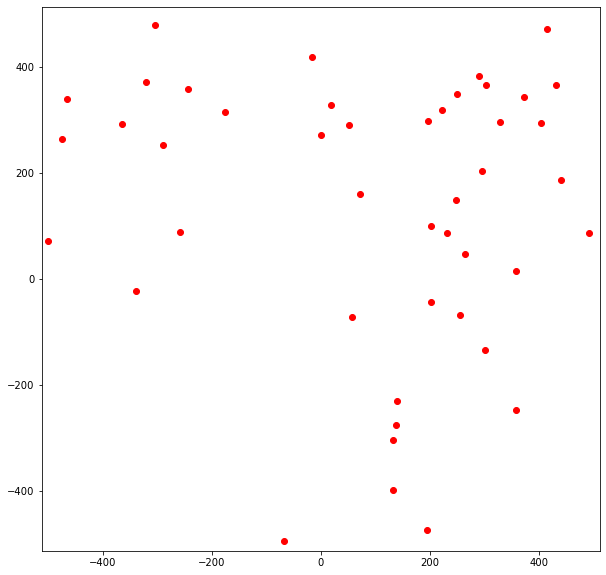

In [112]:
# Display sources in SAMOS Spectral Inst. CCD coordinates

%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(RA_Offsets_IMpix, DEC_Offsets_IMpix, 'ro')
plt.axis([-512, 512, -512, 512])
plt.show()

In [113]:
# OFFsets in in SAMI pixels (SAMOS-SP Channel)
SP_CCD_Scale = 0.133
#
RA_Offsets_SPpix = RA_Offsets / SP_CCD_Scale # in pixels
DEC_Offsets_SPpix = DEC_Offsets / SP_CCD_Scale
print(np.c_[RA_Offsets_SPpix, DEC_Offsets_SPpix])

# OFFsets in in SpecIns pixels (SAMOS-IM Channel)
IM_CCD_Scale = 0.17578125 #180/1024
#
RA_Offsets_IMpix = RA_Offsets / IM_CCD_Scale # in pixels
DEC_Offsets_IMpix = DEC_Offsets / IM_CCD_Scale
print(np.c_[RA_Offsets_IMpix, DEC_Offsets_IMpix])


[[-676.62406015   98.14736842]
 [-643.54736842  356.34586466]
 [-630.47368421  458.71578947]
 [-493.99849624  396.10827068]
 [-459.21654135  -30.88421053]
 [-434.96390977  501.48270677]
 [-412.06466165  646.75488722]
 [-390.57293233  341.21503759]
 [-348.99699248  120.72180451]
 [-329.94135338  484.67368421]
 [-238.56090226  425.88270677]
 [ -90.50075188 -667.70526316]
 [ -21.93834586  565.74135338]
 [   1.63759398  366.82105263]
 [  25.91729323  444.39699248]
 [  70.66015038  393.72631579]
 [  76.64210526  -95.76541353]
 [  96.83458647  215.67518797]
 [ 179.03909774 -537.83458647]
 [ 179.30977444 -410.58947368]
 [ 185.99548872 -371.82857143]
 [ 190.54285714 -310.06015038]
 [ 263.86917293 -640.98947368]
 [ 267.30676692  403.01052632]
 [ 272.80150376  134.90526316]
 [ 272.96390977  -58.35789474]
 [ 302.33233083  431.05263158]
 [ 314.62105263  116.71578947]
 [ 336.00451128  202.22255639]
 [ 339.19849624  472.62857143]
 [ 344.93684211  -91.00150376]
 [ 359.49924812   64.52932331]
 [ 393.8

##  Display the sources in a) the Spectral Instrument,  and b) the SAMI/SAMOS field of view, assumed centered in the CCD field, assumed centered in the middle of the 4098x4098 detector

<Figure size 720x216 with 0 Axes>

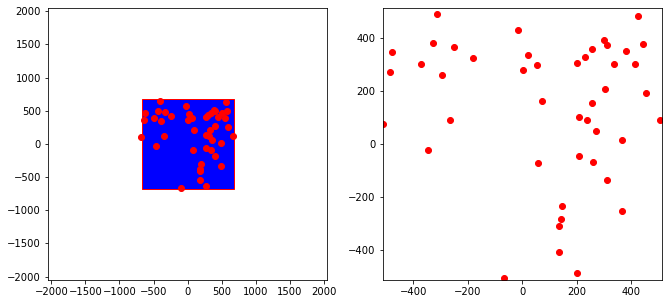

In [114]:
#import matplotlib.pyplot as plt
#import matplotlib.patches as patches
#%matplotlib inline
f = plt.figure(figsize=(10,3))
x1,x2=plt.subplots(1, 2, figsize=(11,5))
x1=plt.subplot(1, 2, 1)
x1.plot(RA_Offsets_SPpix, DEC_Offsets_SPpix, 'ro')
x1.axis([-2048, 2048, -2048, 2048])
rectangle = plt.Rectangle((-675,-675),1350, 1350, fc='blue',ec="red")
plt.gca().add_patch(rectangle)

x2=plt.subplot(1, 2, 2)
x2.plot(RA_Offsets_IMpix, DEC_Offsets_IMpix, 'ro')
x2.axis([-512, 512, -512, 512])

plt.show()


## Display the trace of the spectra in SAMI/SAMOS field of view, assumed 2000 pixels long.

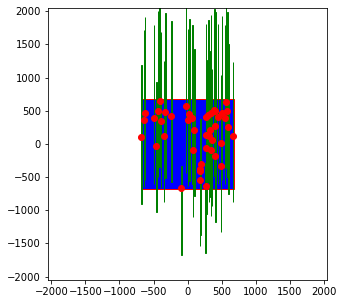

In [115]:
#import matplotlib.pyplot as plt
#import matplotlib.patches as patches
plt.figure(figsize=(5,5))
plt.plot(RA_Offsets_SPpix, DEC_Offsets_SPpix, 'ro')
plt.axis([-2048, 2048, -2048, 2048])
rectangle = plt.Rectangle((-675,-675),1350, 1350, fc='blue',ec="red")
plt.gca().add_patch(rectangle)
for i in range(len(RA_Offsets_IMpix)):
#    print(RA_Offsets_IMpix.iloc[i])
#    print(np.round(RA_Offsets_IMpix.iloc[i]-1),np.round(DEC_Offsets_IMpix.iloc[i]-1000,3, np.round(DEC_Offsets_IMpix.iloc[i]+1000))
    xy = (RA_Offsets_SPpix.iloc[i]-1,np.round(DEC_Offsets_SPpix.iloc[i]-1000))
    rectangle = plt.Rectangle(xy ,7, np.round(DEC_Offsets_SPpix.iloc[i]+2000), fc='green',ec="green")
    plt.gca().add_patch(rectangle)
plt.show()

In [116]:
## Zoom-in
2048/675*16

48.54518518518518

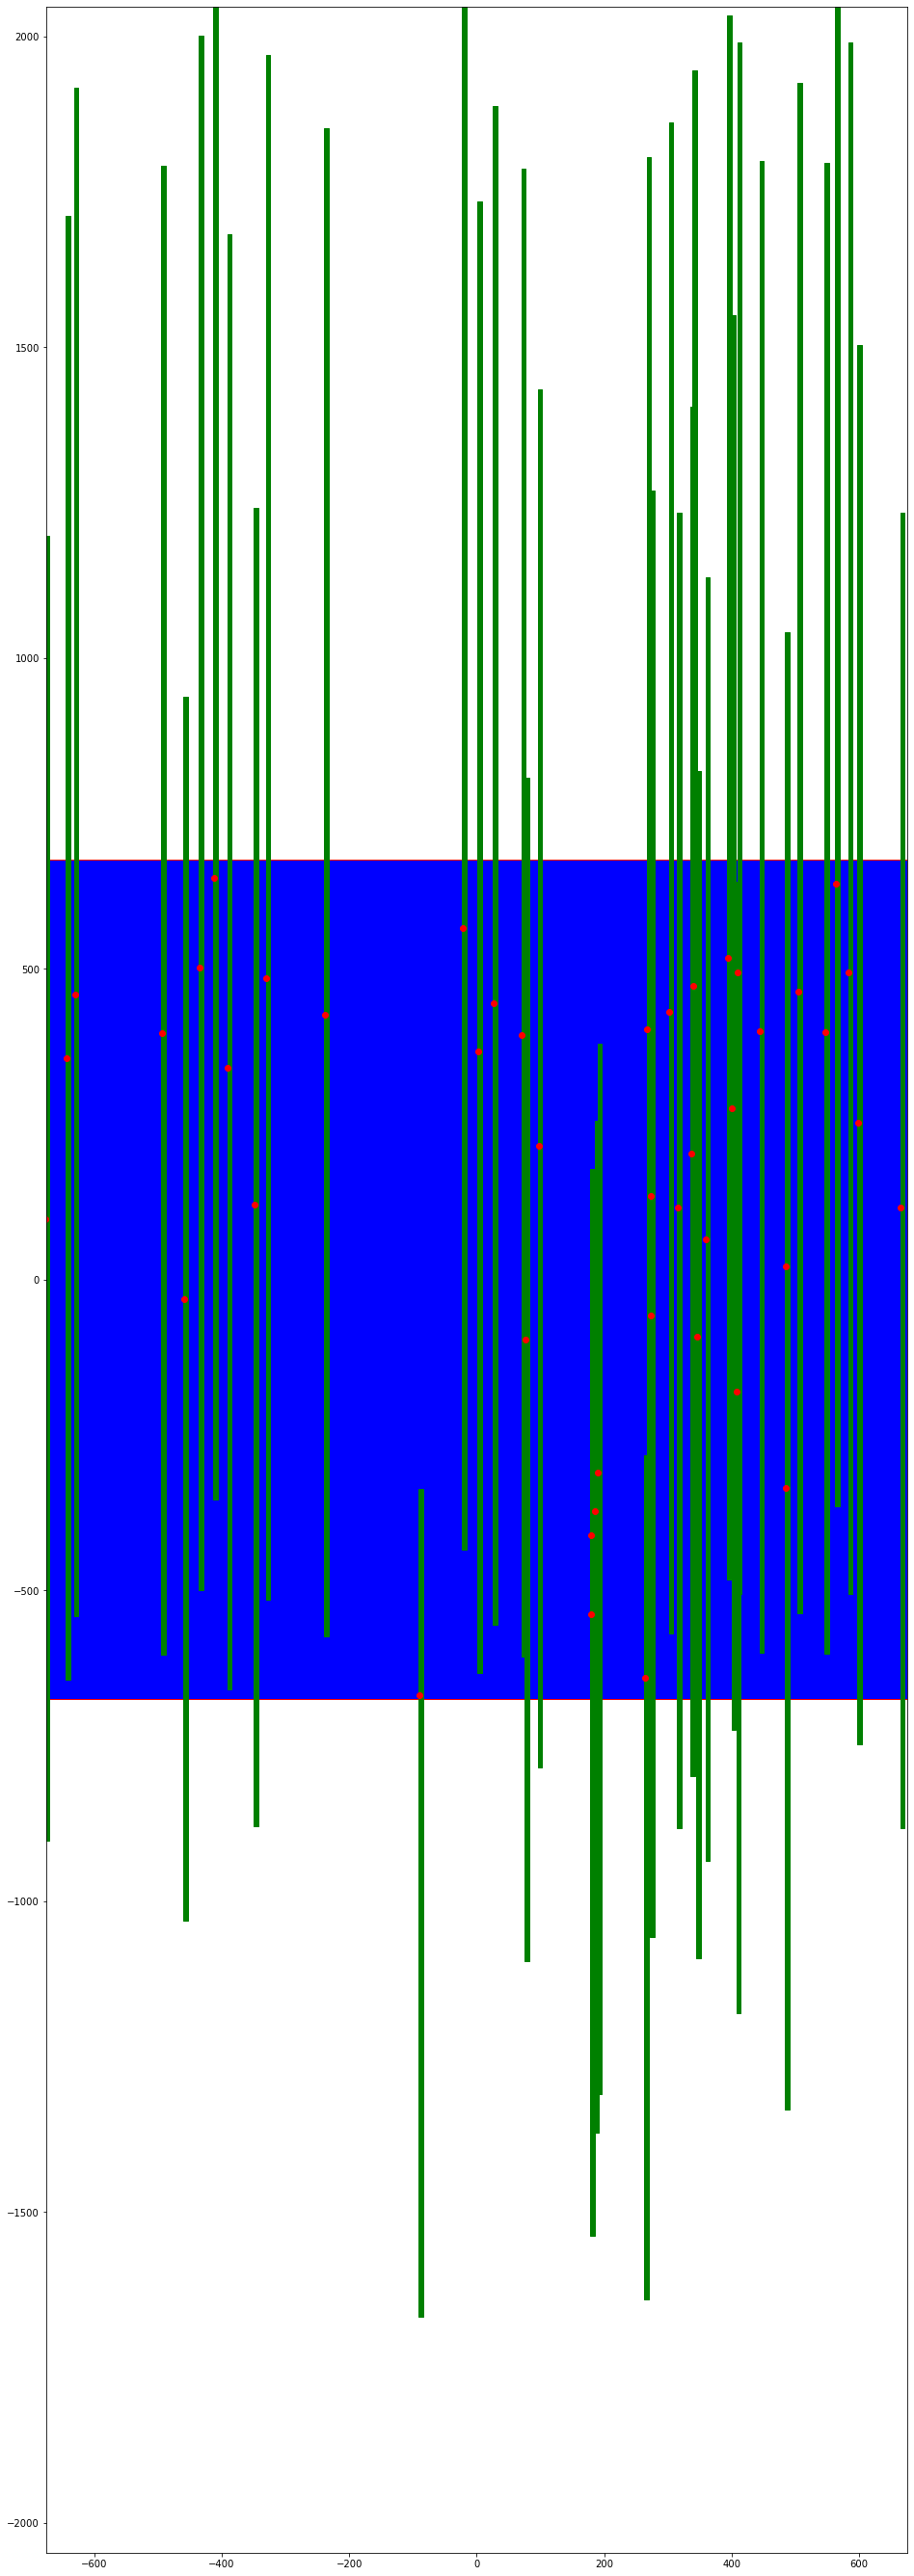

In [117]:
#import matplotlib.pyplot as plt
#import matplotlib.patches as patches
#%matplotlib inline
plt.figure(figsize=(16,48.6))
plt.plot(RA_Offsets_SPpix, DEC_Offsets_SPpix, 'ro')
plt.axis([-675, 675, -2048, 2048])
rectangle = plt.Rectangle((-675,-675),1350, 1350, fc='blue',ec="red")
plt.gca().add_patch(rectangle)
for i in range(len(RA_Offsets_IMpix)):
    xy = (RA_Offsets_SPpix.iloc[i]-1,np.round(DEC_Offsets_SPpix.iloc[i]-1000))
    rectangle = plt.Rectangle(xy ,7, np.round(DEC_Offsets_SPpix.iloc[i]+2000), fc='green',ec="green")
    plt.gca().add_patch(rectangle)
plt.show()

## Export Table

In [118]:
filename  = "DMDmap_Orion_"+str(np.round(RA_Center,13))+"_"+str(np.round(DEC_Center,13))+".csv"

In [119]:
targetlist.to_csv(filename,header=True,index=False)

## CREATE PSEUDO-SAMOS FITS IMAGE

In [120]:
#RA_Center=83.82109750000001 
#DEC_Center=-5.3898675

### Download DSS image from Strasbourg

83.8334705 -5.434184
Filename: /Users/robberto/.astropy/cache/download/url/52a6bd2d43a6749a3859af5682b33d57/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (1056, 1032)   float32   
scale of DSS image:  0.1758522846050928 

to be compared with the default scale of SAMOS
SAMOS scale:  0.17578125


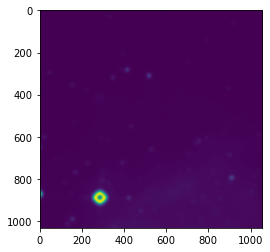

In [121]:
from astroquery.simbad import Simbad                                                            
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy import wcs as astropy_wcs
coord = SkyCoord(str(np.round(RA_Center,13))+'  '+str(np.round(DEC_Center,13)),unit=(u.deg, u.deg), frame='fk5') 
from urllib.parse import urlencode
from astropy.io import fits

print(RA_Center,DEC_Center)

w = astropy_wcs.WCS(header={
    'NAXIS1': 1056,         # Width of the output fits/image
    'NAXIS2': 1032,         # Height of the output fits/image
    'WCSAXES': 2,           # Number of coordinate axes
    'CRPIX1': 528.0,        # Pixel coordinate of reference point
    'CRPIX2': 516.0,        # Pixel coordinate of reference point
    'CDELT1': RA_Center,    # [deg] Coordinate increment at reference point
    'CDELT2': DEC_Center,   # [deg] Coordinate increment at reference point
    'CUNIT1': 'deg',        # Units of coordinate increment and value
    'CUNIT2': 'deg',        # Units of coordinate increment and value
    'CTYPE1': 'GLON-MOL',   # galactic longitude, Mollweide's projection
    'CTYPE2': 'GLAT-MOL',   # galactic latitude, Mollweide's projection
    'CRVAL1': 0.0,          # [deg] Coordinate value at reference point
    'CRVAL2': 0.0,          # [deg] Coordinate value at reference point
})
hips = '2MASS/J'#'CDS/P/DSS2/red'
#result = hips2fits.query_with_wcs(
#   hips=hips,
#   wcs=w,
#   get_query_payload=False,
#   format='fits',
#   min_cut=0.5,
#   max_cut=99.5,
#   cmap=Colormap('viridis'),
#)
query_params = { 
             'hips': '2MASS/J',
#             'wcs': w, 
             'ra': RA_Center, 
             'dec': DEC_Center,
             'fov': (3.095 * u.arcmin).to(u.deg).value, 
             'projection': 'TAN',
             'width': 1056, 
             'height': 1032 
             }                                                                                               
url = f'http://alasky.u-strasbg.fr/hips-image-services/hips2fits?{urlencode(query_params)}' 
hdul = fits.open(url)
hdul.info()
header = hdul[0].header
image = hdul[0].data
#to save
filename  = "Strasbourg_"+str(np.round(RA_Center,13))+"_"+str(np.round(DEC_Center,13))+".fits"
hdul.writeto(filename,overwrite=True)

#print(header)
print('scale of DSS image: ',header['CDELT2']*3600.,'\n')

print("to be compared with the default scale of SAMOS")
print('SAMOS scale: ',180/1024.)

im = plt.imshow(image)
plt.show(im)

In [122]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1056                                                  
NAXIS2  =                 1032                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                528.0 / Pixel coordinate of reference point            
CRPIX2  =                516.0 / Pixel coordinate of reference point            
CDELT1  = -4.8847856834747E-05 / [deg] Coordinate increment at reference point  
CDELT2  =  4.8847856834748E-05 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---TAN'        

### Take a SAMOS SpecInst image, to use the header

In [123]:
hdu_SAMOS = fits.open('./SAMOS_imaging_camera_tests/test_3s_light.fits')
hdu_SAMOS.info()

Filename: ./SAMOS_imaging_camera_tests/test_3s_light.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      88   (1056, 1032)   int16 (rescales to uint16)   


In [124]:
hdr_SAMOS = hdu_SAMOS[0].header
hdr_SAMOS

SIMPLE  =                    T / FITS Standard                                  
BITPIX  =                   16 / FITS Bits/Pixel (-16 signifies [U16])          
NAXIS   =                    2 / Number of Axes                                 
NAXIS1  =                 1056 / Length of Axis 1 (Columns)                     
NAXIS2  =                 1032 / Length of Axis 2 (Rows)                        
BSCALE  =                    1 / Scaling Factor (Default=1)                     
BZERO   =                32768 / Offset Factor (Default=0)                      
DATE-OBS= '2021-03-12T16:44:47.275' / DATE-OBS Format: YYYY-MM-DDThh:mm:ss.sss  
DATE    = '2021-03-12'         / Date Format is YYYY-MM-DD                      
TIME    = '16:44:47.275 to 16:44:50.288' / ~ Start & Stop of Exposure           
EXPTIME =                3.000 / Exposure Time, Sec.                            
N_PRM0  =                   11 / Status                                         
PG0_0   =                   

## Cleanup SAMOS Header

In [125]:
del hdr_SAMOS[11:90]
hdr_SAMOS

SIMPLE  =                    T / FITS Standard                                  
BITPIX  =                   16 / FITS Bits/Pixel (-16 signifies [U16])          
NAXIS   =                    2 / Number of Axes                                 
NAXIS1  =                 1056 / Length of Axis 1 (Columns)                     
NAXIS2  =                 1032 / Length of Axis 2 (Rows)                        
BSCALE  =                    1 / Scaling Factor (Default=1)                     
BZERO   =                32768 / Offset Factor (Default=0)                      
DATE-OBS= '2021-03-12T16:44:47.275' / DATE-OBS Format: YYYY-MM-DDThh:mm:ss.sss  
DATE    = '2021-03-12'         / Date Format is YYYY-MM-DD                      
TIME    = '16:44:47.275 to 16:44:50.288' / ~ Start & Stop of Exposure           
EXPTIME =                3.000 / Exposure Time, Sec.                            

### Add to SAMOS header the parameters from SOAR

see https://fits.gsfc.nasa.gov/fits_dictionary.html

In [126]:
print(0.17578125/3600.)
c = SkyCoord(str(RA_Center)+' '+str(DEC_Center), unit=(u.hourangle, u.deg))
RA_Center_RND = RA_Center + np.random.randn()/3600. # add a 1" stdev error in the telescope pointing... 
DEC_Center_RND = DEC_Center + np.random.randn()/3600.  

4.8828125e-05


In [127]:
#this string is supposed to arrive from the telescope via tk_class_SOAR.py 
SOAR_info_string = "DONE 2002-04-15 17:06:52 05:52:53.81 -52:14:46.54 -03:54:13.05 136.34 42.31 274.64 136.34 42.31 1.484"
SOAR_info_split = SOAR_info_string.split()
SOAR_info_split
hdr_SAMOS['DATE-OBS'] = (SOAR_info_split[1]+'T'+SOAR_info_split[2])
hdr_SAMOS['DATE'] = (SOAR_info_split[1])
hdr_SAMOS['TIME'] = (SOAR_info_split[2],'Start of Exposure')
hdr_SAMOS['CRVAL1'] = (RA_Center_RND) # RA coming from SOAR telescope
hdr_SAMOS['CRVAL2'] = (DEC_Center_RND) # DEC coming from SOAR telescope
hdr_SAMOS['TCS_HA'] = (SOAR_info_split[5],'hour angle')
hdr_SAMOS['TCZ_AZ'] = (SOAR_info_split[6],'azimuth')
hdr_SAMOS['TCS_EL'] = (SOAR_info_split[7],'elevation')
hdr_SAMOS['TCS_ROT'] = (SOAR_info_split[8],'rotator angle')
hdr_SAMOS['TCS_DOME'] = (SOAR_info_split[9],'dome angle')
hdr_SAMOS['TCS_ELEV'] = (SOAR_info_split[10],'dome elevation')
hdr_SAMOS['AIRMASS'] = (SOAR_info_split[11],'airmass')


### Add to SAMOS header the parameters from SAMOS

In [128]:
hdr_SAMOS['WCSAXES'] = (2,'Number of coordinate axes')                      
hdr_SAMOS['CRPIX1'] = (528.0,'x pixel coordinate of reference point')            
hdr_SAMOS['CRPIX2'] = (516.0,'y pixel coordinate of reference point')            
hdr_SAMOS['CDELT1'] = (-4.8828125e-05,'[deg] Coordinate increment at reference point')
hdr_SAMOS['CDELT2'] = (4.8828125e-05,'[deg] Coordinate increment at reference point')  
hdr_SAMOS['CUNIT1'] = ('deg','Units of coordinate increment and value')        
hdr_SAMOS['CUNIT2'] = ('deg','Units of coordinate increment and value')        
hdr_SAMOS['CTYPE1'] = ('RA---TAN','Right ascension, gnomonic projection')           
hdr_SAMOS['CTYPE2'] = ('DEC--TAN','Declination, gnomonic projection')   
hdr_SAMOS['RA_DMD'] = (DEC_Center,'RA_center of DMD target list')             
hdr_SAMOS['DEC_DMD'] = (DEC_Center,'DEC_center of DMD target list')            
hdr_SAMOS['RADESYS'] = ('ICRS','Equatorial coordinate system')     

#to be continued with filters etc... see SAMI

In [129]:
hdr_SAMOS

SIMPLE  =                    T / FITS Standard                                  
BITPIX  =                   16 / FITS Bits/Pixel (-16 signifies [U16])          
NAXIS   =                    2 / Number of Axes                                 
NAXIS1  =                 1056 / Length of Axis 1 (Columns)                     
NAXIS2  =                 1032 / Length of Axis 2 (Rows)                        
BSCALE  =                    1 / Scaling Factor (Default=1)                     
BZERO   =                32768 / Offset Factor (Default=0)                      
DATE-OBS= '2002-04-15T17:06:52' / DATE-OBS Format: YYYY-MM-DDThh:mm:ss.sss      
DATE    = '2002-04-15'         / Date Format is YYYY-MM-DD                      
TIME    = '17:06:52'           / Start of Exposure                              
EXPTIME =                3.000 / Exposure Time, Sec.                            
CRVAL1  =    83.83369341673507                                                  
CRVAL2  =   -5.4340892272553

## Finally save the new SAMOS file

In [130]:
hdu_SAMOS[0].header = hdr_SAMOS
hdu_SAMOS[0].data = hdul[0].data
filename  = "SAMOS_"+str(np.round(RA_Center,13))+"_"+str(np.round(DEC_Center,13))+"_.fits"
hdu_SAMOS.writeto(filename,overwrite=True)

In [131]:
print(hdr_SAMOS)

SIMPLE  =                    T / FITS Standard                                  BITPIX  =                  -32 / FITS Bits/Pixel (-16 signifies [U16])          NAXIS   =                    2 / Number of Axes                                 NAXIS1  =                 1056 / Length of Axis 1 (Columns)                     NAXIS2  =                 1032 / Length of Axis 2 (Rows)                        BSCALE  =                    1 / Scaling Factor (Default=1)                     BZERO   =                32768 / Offset Factor (Default=0)                      DATE-OBS= '2002-04-15T17:06:52' / DATE-OBS Format: YYYY-MM-DDThh:mm:ss.sss      DATE    = '2002-04-15'         / Date Format is YYYY-MM-DD                      TIME    = '17:06:52'           / Start of Exposure                              EXPTIME =                3.000 / Exposure Time, Sec.                            CRVAL1  =    83.83369341673507                                                  CRVAL2  =   -5.434089227255326          